# Business Question: 
## Based upon customer data provided by a global bank, please provide a Exiting Customer list to Marketing Team.
## The Exiting Customer list will be used to retain customer who is going to exit the bank.

# Import Library

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

# Data Extraction

In [3]:
df=pd.read_csv('Churn_Modelling.csv')

# EDA

## Checking Missing Value and Data Type

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
df.groupby('Exited').agg({'CustomerId':'count'})

,CustomerId
Exited,
0,7963
1,2037


#### 1) There is no missing value
#### 2) Numerical Data: Age, Estimated Salary, Tenure, Balance, CreditScore, 
#### 3a) Categorical Data: Gender, Geography
#### 3b) HasCrDard, IsActiveMember and NumofProducts should be Categorical/ Binary Data rather than int64
#### 4a) Label: Exited should be Categorical data
#### 4b) Label: Exited is imbalance, the proportion of Exit:Not Exit around 20%:80%

## Prepare Dataset for EDA

In [6]:
EDA_Data=df.copy()
EDA_Data['Exited']=EDA_Data['Exited'].apply(lambda x: 'Exit' if x==1 else 'Not Exit')
EDA_Data['HasCrCard']=EDA_Data['HasCrCard'].apply(lambda x: 'Has Credit Card' if x==1 else 'Do not have Credit Card')
EDA_Data['IsActiveMember']=EDA_Data['IsActiveMember'].apply(lambda x: 'Active Member' if x==1 else 'Inactive Member')
EDA_Data['NumOfProducts']=EDA_Data['NumOfProducts'].astype('str')

In [7]:
EDA_Data.drop(['RowNumber','CustomerId'],axis=1).describe()

,CreditScore,Age,Tenure,Balance,EstimatedSalary
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,100090.239881
std,96.653299,10.487806,2.892174,62397.405202,57510.492818
min,350.000000,18.000000,0.000000,0.000000,11.580000
25%,584.000000,32.000000,3.000000,0.000000,51002.110000
50%,652.000000,37.000000,5.000000,97198.540000,100193.915000
75%,718.000000,44.000000,7.000000,127644.240000,149388.247500
max,850.000000,92.000000,10.000000,250898.090000,199992.480000


## Part 1: Relationship between Numerical Data and Exited

### 1) Relationship between Age and Exited

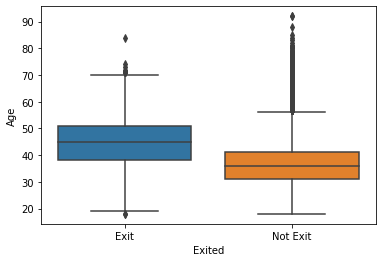

In [8]:
sns.boxplot(x='Exited',y='Age',data=EDA_Data)

#### Overall, customer who exited is older than those not exit. 
#### The median of exited customer is around 45 years old.
#### The median of exited customer is already older than 75% not exit customer.

### 2) Relationship between Tenure and Exited

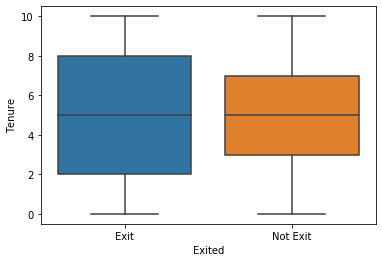

In [9]:
sns.boxplot(x='Exited',y='Tenure',data=EDA_Data)

#### Compare to Not Exist Customer, Customer who join less than 3 years or above 7 years are more likely to exit.

### 3) Relationship between Balance and Exited

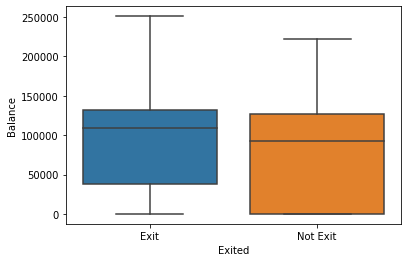

In [10]:
sns.boxplot(x='Exited',y='Balance',data=EDA_Data)

#### Customer whose balance less than $40000 are more likely not exit
#### The top 25% exit customer has higher balance than those not exit

### 4) Relationship between Credit Score and Exited

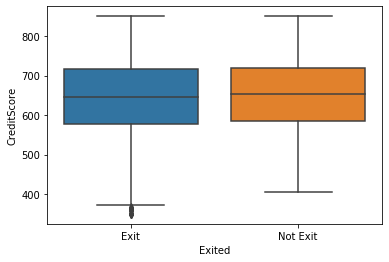

In [11]:
sns.boxplot(x='Exited',y='CreditScore',data=EDA_Data)

#### Credit Score only slightly correlated to Exited. 
#### Customer with lower credt score slightly exit.
#### There are some outliers whose score fall around 350. 

### 5) Relationship between EstimatedSalary and Exited

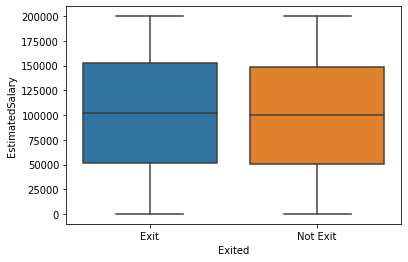

In [12]:
sns.boxplot(x='Exited',y='EstimatedSalary',data=EDA_Data)

## Part 2: Relationship between Categorical Data and Exited

#### Estimated Salary do not correlated to Exited.

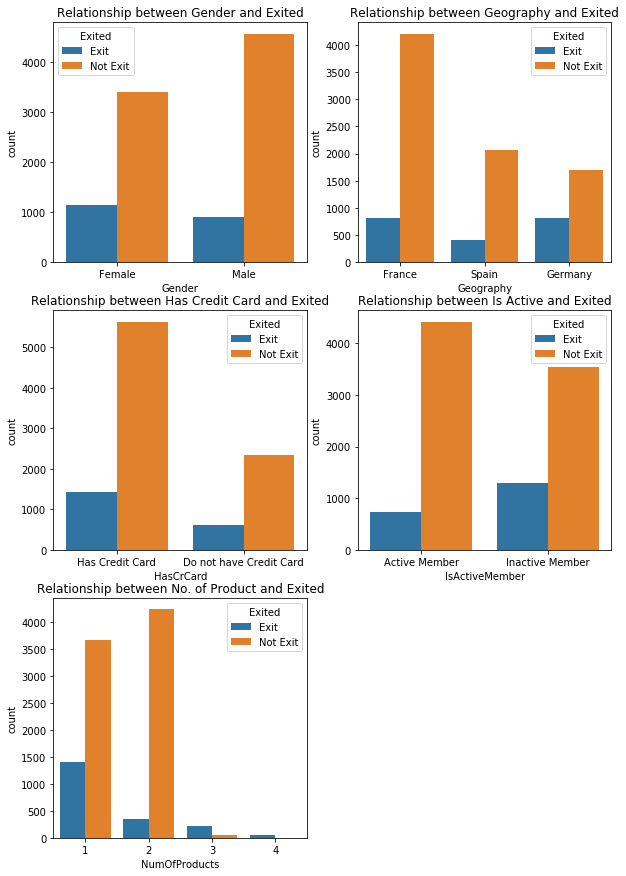

In [13]:
fig, axis = plt.subplots(3, 2, figsize=(10,15),)
axis[0,0].set_title("Relationship between Gender and Exited")
axis[0,1].set_title("Relationship between Geography and Exited")
axis[1,0].set_title("Relationship between Has Credit Card and Exited")
axis[1,1].set_title("Relationship between Is Active and Exited")
axis[2,0].set_title("Relationship between No. of Product and Exited")

sns.countplot(x='Gender',hue='Exited',data=EDA_Data,ax=axis[0,0])
sns.countplot(x='Geography',hue='Exited',data=EDA_Data,ax=axis[0,1])
sns.countplot(x='HasCrCard',hue='Exited',data=EDA_Data,ax=axis[1,0])
sns.countplot(x='IsActiveMember',hue='Exited',data=EDA_Data,ax=axis[1,1])
sns.countplot(x='NumOfProducts',hue='Exited',data=EDA_Data,ax=axis[2,0])

axis[2,1].remove()

#### From the above diagram, we can see that:
#### 1) Female is easier exit than Male
#### 2) Customer in Germany more likely to exit
#### 3) Inactive Member has higher proportion to exit than Active Member
#### 4) Credit Card is not correlated to Exit
#### 5) Customer with 2 products have higher proportion not exit

### Correlation between features

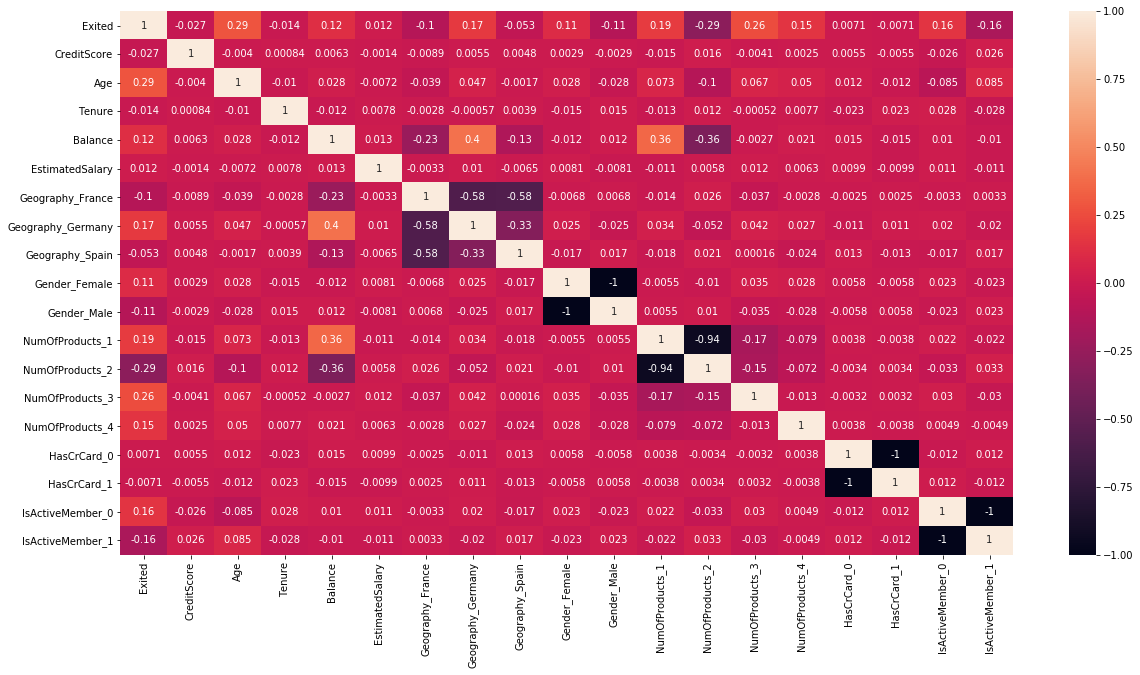

In [14]:
plt.figure(figsize=(20,10))
EDA2=df.iloc[:,3:-1]
EDA2=pd.concat([df.iloc[:,-1],EDA2,],axis=1)
EDA2=pd.get_dummies(EDA2,columns=['Geography','Gender','NumOfProducts','HasCrCard','IsActiveMember'])
sns.heatmap(EDA2.corr(),vmin=-1,vmax=1,annot=True)

#### Features with color close to 0 means no correlation, 
#### Features with color close to -1 or 1 means having strong negative or postive relationship to each other respectively. 
#### From the above heat map, we can see that all features only have weak relationship to each other.
#### Features that have relative slightly relationship with Exited include:
#### Age, NumOfProduct, Geography, IsActiveMember,Balance,Gender

## Train Data without Feature Selected - Set 1

In [249]:
X0=df.iloc[:,3:-1]
X0_c=X0.loc[:,['Geography','Gender','NumOfProducts','HasCrCard','IsActiveMember']]

#### Apply OneHotEncoding to Categorical Data: (Geography,Gender,NumOfProducts,HasCrCard,IsActiveMember)

In [250]:
X0_c=pd.get_dummies(X0_c)

In [251]:
from sklearn.preprocessing import StandardScaler
X0_n=X0.loc[:,['CreditScore','Age','Balance','Tenure','EstimatedSalary']]
scaler = StandardScaler()
X0_n1=scaler.fit_transform(X0_n)

In [252]:
X0_n1=pd.DataFrame(X0_n1,columns=['CreditScore','Age','Balance','Tenure','EstimatedSalary'])

In [253]:
X=pd.concat([X0_c,X0_n1],axis=1)
y=EDA_Data['Exited'].apply(lambda x: 1 if x=='Exit' else 0)

In [254]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Generating new data by oversampling
#### As mentioned before, the data is imbalnce, so, we increase the number of samples by SMOTE technique

In [255]:
#conda install -c conda-forge imbalanced-learn

In [256]:
from imblearn.over_sampling import SMOTE
smk = SMOTE()
# Oversample training  data
X_train, y_train = smk.fit_sample(X_train, y_train)

# Oversample validation data
X_test, y_test = smk.fit_sample(X_test, y_test)

In [257]:
print(y_train.value_counts(),'\n',y_test.value_counts())

1    6356
0    6356
Name: Exited, dtype: int64 
 1    1607
0    1607
Name: Exited, dtype: int64


#### Start to Train Model

In [258]:
Accuracy_Score=[]
Recall_Score=[]
Precision_Score=[]
F1_Score=[]

### Logistic Regression

In [259]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=42).fit(X_train, y_train)
y_pred=clf.predict(X_test)
s1_1_y_pred=y_pred
clf.score(X_test, y_test)

0.7806471686372122

In [260]:
print(' Accuracy Score: %.3f' % accuracy_score(y_test, y_pred) ,'\n', 
      'Recall Score: %.3f' % recall_score(y_test, y_pred) ,'\n', #True Postive out of Actual Postive
      'Precision Score: %.3f' % precision_score(y_test, y_pred) ,'\n', #True Postive out of Predicted Postive
      'F1 Score Score: %.3f' % f1_score(y_test, y_pred) ) #Close to 1 is better; Close to 0 is worse

Accuracy_Score.append(accuracy_score(y_test, y_pred))
Recall_Score.append(recall_score(y_test, y_pred))
Precision_Score.append(precision_score(y_test, y_pred))
F1_Score.append(f1_score(y_test, y_pred))

 Accuracy Score: 0.781 
 Recall Score: 0.808 
 Precision Score: 0.766 
 F1 Score Score: 0.786


### SVC (Support Vector Classifier)

In [261]:
from sklearn.svm import SVC
clf = SVC(random_state=42)
svc=clf.fit(X_train, y_train)
y_pred=svc.predict(X_test)
s1_2_y_pred=y_pred
svc.score(X_test, y_test)

0.822028624766646

In [262]:
print(' Accuracy Score: %.3f' % accuracy_score(y_test, y_pred) ,'\n', 
      'Recall Score: %.3f' % recall_score(y_test, y_pred) ,'\n', #True Postive out of Actual Postive
      'Precision Score: %.3f' % precision_score(y_test, y_pred) ,'\n', #True Postive out of Predicted Postive
      'F1 Score Score: %.3f' % f1_score(y_test, y_pred) ) #Close to 1 is better; Close to 0 is worse

Accuracy_Score.append(accuracy_score(y_test, y_pred))
Recall_Score.append(recall_score(y_test, y_pred))
Precision_Score.append(precision_score(y_test, y_pred))
F1_Score.append(f1_score(y_test, y_pred))

 Accuracy Score: 0.822 
 Recall Score: 0.823 
 Precision Score: 0.821 
 F1 Score Score: 0.822


### Random Forest

In [263]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
s1_3_y_pred=y_pred
clf.score(X_test, y_test)

0.8210952084629745

In [264]:
print(' Accuracy Score: %.3f' % accuracy_score(y_test, y_pred) ,'\n', 
      'Recall Score: %.3f' % recall_score(y_test, y_pred) ,'\n', #True Postive out of Actual Postive
      'Precision Score: %.3f' % precision_score(y_test, y_pred) ,'\n', #True Postive out of Predicted Postive
      'F1 Score Score: %.3f' % f1_score(y_test, y_pred) ) #Close to 1 is better; Close to 0 is worse

Accuracy_Score.append(accuracy_score(y_test, y_pred))
Recall_Score.append(recall_score(y_test, y_pred))
Precision_Score.append(precision_score(y_test, y_pred))
F1_Score.append(f1_score(y_test, y_pred))

 Accuracy Score: 0.821 
 Recall Score: 0.750 
 Precision Score: 0.874 
 F1 Score Score: 0.807


### XGBoost

In [265]:
import xgboost as xgb
dtrain = xgb.DMatrix(data = X_train, label = y_train) 
dtest = xgb.DMatrix(data = X_test, label = y_test) 
# specify parameters via map
param = {'max_depth':6, 'eta':0.3, 'objective':'binary:hinge' } #Use default value in the first time
num_round = 2
bst = xgb.train(param, dtrain, num_round)
# make prediction
y_pred = bst.predict(dtest)
s1_4_y_pred=y_pred
accuracy_score(y_test,y_pred)

0.6057871810827629

In [266]:
print(' Accuracy Score: %.3f' % accuracy_score(y_test, y_pred) ,'\n', 
      'Recall Score: %.3f' % recall_score(y_test, y_pred) ,'\n', #True Postive out of Actual Postive
      'Precision Score: %.3f' % precision_score(y_test, y_pred) ,'\n', #True Postive out of Predicted Postive
      'F1 Score Score: %.3f' % f1_score(y_test, y_pred) ) #Close to 1 is better; Close to 0 is worse

Accuracy_Score.append(accuracy_score(y_test, y_pred))
Recall_Score.append(recall_score(y_test, y_pred))
Precision_Score.append(precision_score(y_test, y_pred))
F1_Score.append(f1_score(y_test, y_pred))

 Accuracy Score: 0.606 
 Recall Score: 0.974 
 Precision Score: 0.561 
 F1 Score Score: 0.712


In [267]:
# Set 1 Score:
ind_name=['Accuracy_Score','Recall_Score','Precision_Score','F1_Score']
summary1=pd.DataFrame(np.vstack((Accuracy_Score,Recall_Score,Precision_Score,F1_Score)),columns=['Logistic Reg.','SVC','Random Forest','XGB'],index=ind_name)
summary1

,Logistic Reg.,SVC,Random Forest,XGB
Accuracy_Score,0.780647,0.822029,0.821095,0.605787
Recall_Score,0.807716,0.823273,0.750467,0.973864
Precision_Score,0.766234,0.821229,0.873913,0.560932
F1_Score,0.786428,0.822250,0.807499,0.711849


## Train Data with Feature Selected (Based on EDA) - Set 2 
### [Keep all hyperparameter same as Set 1]

### Remove Estimated Salary, Has Credit Card, Credit Score and Tenure refer to EDA

In [268]:
X1=df.iloc[:,3:-1]
X1_c=X1.loc[:,['Geography','Gender','NumOfProducts','IsActiveMember']]
X1_n=X1.loc[:,['Age','Balance']]

### Part 1: Distribution of Numerical Feature

In [269]:
EDA_Data[EDA_Data['Exited']=='Exit'].describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,EstimatedSalary
count,2037.000000,2.037000e+03,2037.000000,2037.000000,2037.000000,2037.000000,2037.000000
mean,4905.917526,1.569005e+07,645.351497,44.837997,4.932744,91108.539337,101465.677531
std,2866.855245,7.269262e+04,100.321503,9.761562,2.936106,58360.794816,57912.418071
min,1.000000,1.556571e+07,350.000000,18.000000,0.000000,0.000000,11.580000
25%,2419.000000,1.562736e+07,578.000000,38.000000,2.000000,38340.020000,51907.720000
50%,4871.000000,1.568896e+07,646.000000,45.000000,5.000000,109349.290000,102460.840000
75%,7404.000000,1.575309e+07,716.000000,51.000000,8.000000,131433.330000,152422.910000
max,9999.000000,1.581566e+07,850.000000,84.000000,10.000000,250898.090000,199808.100000


In [270]:
EDA_Data[EDA_Data['Exited']=='Not Exit'].describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,EstimatedSalary
count,7963.000000,7.963000e+03,7963.000000,7963.000000,7963.000000,7963.000000,7963.000000
mean,5024.694964,1.569117e+07,651.853196,37.408389,5.033279,72745.296779,99738.391772
std,2891.682053,7.174423e+04,95.653837,10.125363,2.880658,62848.040701,57405.586966
min,2.000000,1.556570e+07,405.000000,18.000000,0.000000,0.000000,90.070000
25%,2526.500000,1.562882e+07,585.000000,31.000000,3.000000,0.000000,50783.490000
50%,5042.000000,1.569154e+07,653.000000,36.000000,5.000000,92072.680000,99645.040000
75%,7525.500000,1.575335e+07,718.000000,41.000000,7.000000,126410.280000,148609.955000
max,10000.000000,1.581569e+07,850.000000,92.000000,10.000000,221532.800000,199992.480000


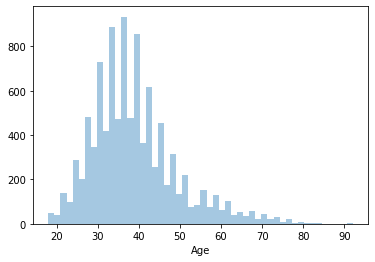

In [271]:
sns.distplot(a=EDA_Data['Age'],kde=False)

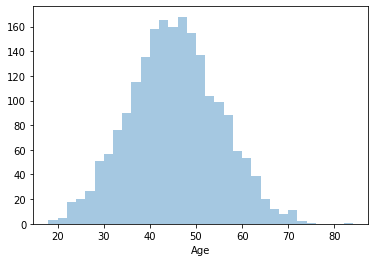

In [272]:
Age1=EDA_Data[EDA_Data['Exited']=='Exit']
sns.distplot(a=Age1['Age'],kde=False)

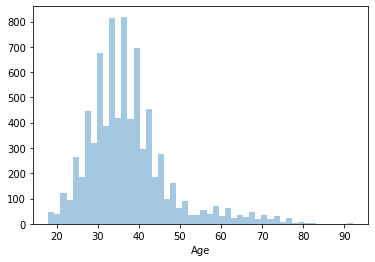

In [273]:
Age1=EDA_Data[EDA_Data['Exited']=='Not Exit']
sns.distplot(a=Age1['Age'],kde=False)

In [274]:
def age_gp(a):
    if a>=18 and a<30:
        return 'Gp1'
    elif a>=30 and a<40:
        return 'Gp2'
    elif a>=40 and a<50:
        return 'Gp3'
    elif a>=50:
        return 'Gp4'

In [275]:
X1_c['Age_group']=X1_n['Age'].apply(age_gp)

In [276]:
X1_c.head(3)

,Geography,Gender,NumOfProducts,IsActiveMember,Age_group
0,France,Female,1,1,Gp3
1,Spain,Female,1,1,Gp3
2,France,Female,3,0,Gp3


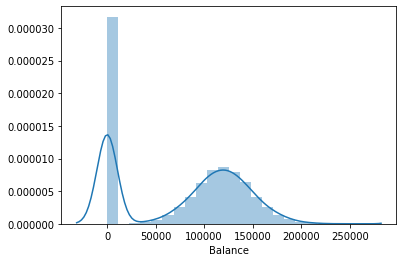

In [277]:
sns.distplot(a=EDA_Data['Balance'])

In [278]:
X1_c['Balance_Group']=X1_n['Balance'].apply(lambda x: 'Without Balance' if x<50000 else 'With Balance')

In [279]:
## As All of X's are Catergorical Data, only need transfer them to Binary Dataa

In [280]:
X1_c2=pd.get_dummies(X1_c)
y=EDA_Data['Exited'].apply(lambda x: 1 if x=='Exit' else 0)

In [281]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1_c2, y, test_size=0.2, random_state=42)

#### Generating new data by oversampling
#### Same as before, as the data is imbalnce, so, we increase the number of samples by SMOTE technique

In [282]:
from imblearn.over_sampling import SMOTE
smk = SMOTE()
# Oversample training  data
X_train, y_train = smk.fit_sample(X_train, y_train)

# Oversample validation data
X_test, y_test = smk.fit_sample(X_test, y_test)

In [283]:
print(y_train.value_counts(),'\n',y_test.value_counts())

1    6356
0    6356
Name: Exited, dtype: int64 
 1    1607
0    1607
Name: Exited, dtype: int64


#### Start to Train Model

In [284]:
Accuracy_Score=[]
Recall_Score=[]
Precision_Score=[]
F1_Score=[]

### Logistic Regression

In [285]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=42).fit(X_train, y_train)
y_pred=clf.predict(X_test)
s2_1_y_pred=y_pred
clf.score(X_test, y_test)


0.7479775980087119

In [286]:
print(' Accuracy Score: %.3f' % accuracy_score(y_test, y_pred) ,'\n', 
      'Recall Score: %.3f' % recall_score(y_test, y_pred) ,'\n', #True Postive out of Actual Postive
      'Precision Score: %.3f' % precision_score(y_test, y_pred) ,'\n', #True Postive out of Predicted Postive
      'F1 Score Score: %.3f' % f1_score(y_test, y_pred) ) #Close to 1 is better; Close to 0 is worse

Accuracy_Score.append(accuracy_score(y_test, y_pred))
Recall_Score.append(recall_score(y_test, y_pred))
Precision_Score.append(precision_score(y_test, y_pred))
F1_Score.append(f1_score(y_test, y_pred))

 Accuracy Score: 0.748 
 Recall Score: 0.785 
 Precision Score: 0.731 
 F1 Score Score: 0.757


### SVC (Support Vector Classifier)

In [287]:
from sklearn.svm import SVC
clf = SVC(random_state=42)
svc=clf.fit(X_train, y_train)
y_pred=svc.predict(X_test)
s2_2_y_pred=y_pred
svc.score(X_test, y_test)

0.7859365276913504

In [288]:
print(' Accuracy Score: %.3f' % accuracy_score(y_test, y_pred) ,'\n', 
      'Recall Score: %.3f' % recall_score(y_test, y_pred) ,'\n', #True Postive out of Actual Postive
      'Precision Score: %.3f' % precision_score(y_test, y_pred) ,'\n', #True Postive out of Predicted Postive
      'F1 Score Score: %.3f' % f1_score(y_test, y_pred) ) #Close to 1 is better; Close to 0 is worse

Accuracy_Score.append(accuracy_score(y_test, y_pred))
Recall_Score.append(recall_score(y_test, y_pred))
Precision_Score.append(precision_score(y_test, y_pred))
F1_Score.append(f1_score(y_test, y_pred))

 Accuracy Score: 0.786 
 Recall Score: 0.812 
 Precision Score: 0.772 
 F1 Score Score: 0.791


### Random Forest

In [289]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
s2_3_y_pred=y_pred
clf.score(X_test, y_test)

0.790914747977598

In [290]:
print(' Accuracy Score: %.3f' % accuracy_score(y_test, y_pred) ,'\n', 
      'Recall Score: %.3f' % recall_score(y_test, y_pred) ,'\n', #True Postive out of Actual Postive
      'Precision Score: %.3f' % precision_score(y_test, y_pred) ,'\n', #True Postive out of Predicted Postive
      'F1 Score Score: %.3f' % f1_score(y_test, y_pred) ) #Close to 1 is better; Close to 0 is worse

Accuracy_Score.append(accuracy_score(y_test, y_pred))
Recall_Score.append(recall_score(y_test, y_pred))
Precision_Score.append(precision_score(y_test, y_pred))
F1_Score.append(f1_score(y_test, y_pred))

 Accuracy Score: 0.791 
 Recall Score: 0.800 
 Precision Score: 0.786 
 F1 Score Score: 0.793


### XGBoosting

In [291]:
import xgboost as xgb
dtrain = xgb.DMatrix(data = X_train, label = y_train) 
dtest = xgb.DMatrix(data = X_test, label = y_test) 
# specify parameters via map
param = {'max_depth':6, 'eta':0.3, 'objective':'binary:hinge' }
num_round = 2
bst = xgb.train(param, dtrain, num_round)
# make prediction
y_pred = bst.predict(dtest)
s2_4_y_pred=y_pred
accuracy_score(y_test,y_pred)

0.5752955818294959

In [292]:
print(' Accuracy Score: %.3f' % accuracy_score(y_test, y_pred) ,'\n', 
      'Recall Score: %.3f' % recall_score(y_test, y_pred) ,'\n', #True Postive out of Actual Postive
      'Precision Score: %.3f' % precision_score(y_test, y_pred) ,'\n', #True Postive out of Predicted Postive
      'F1 Score Score: %.3f' % f1_score(y_test, y_pred) ) #Close to 1 is better; Close to 0 is worse

Accuracy_Score.append(accuracy_score(y_test, y_pred))
Recall_Score.append(recall_score(y_test, y_pred))
Precision_Score.append(precision_score(y_test, y_pred))
F1_Score.append(f1_score(y_test, y_pred))

 Accuracy Score: 0.575 
 Recall Score: 0.985 
 Precision Score: 0.541 
 F1 Score Score: 0.699


In [293]:
# Set 2 Score:
ind_name=['Accuracy_Score','Recall_Score','Precision_Score','F1_Score']
summary2=pd.DataFrame(np.vstack((Accuracy_Score,Recall_Score,Precision_Score,F1_Score)),columns=['Logistic Reg.','SVC','Random Forest','XGB'],index=ind_name)
summary2

,Logistic Reg.,SVC,Random Forest,XGB
Accuracy_Score,0.747978,0.785937,0.790915,0.575296
Recall_Score,0.785314,0.812072,0.799627,0.985065
Precision_Score,0.730747,0.771733,0.785933,0.541382
F1_Score,0.757049,0.791389,0.792721,0.698742


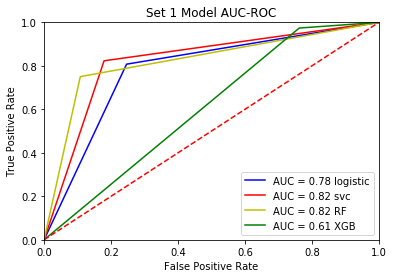

In [294]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = clf.predict_proba(X_test)
preds = probs[:,1]


fpr11, tpr11, threshold = metrics.roc_curve(y_test, s1_1_y_pred)
roc_auc11 = metrics.auc(fpr11, tpr11)
fpr12, tpr12, threshold = metrics.roc_curve(y_test, s1_2_y_pred)
roc_auc12 = metrics.auc(fpr12, tpr12)
fpr13, tpr13, threshold = metrics.roc_curve(y_test, s1_3_y_pred)
roc_auc13 = metrics.auc(fpr13, tpr13)
fpr14, tpr14, threshold = metrics.roc_curve(y_test, s1_4_y_pred)
roc_auc14 = metrics.auc(fpr14, tpr14)


# method I: plt
import matplotlib.pyplot as plt
plt.title('Set 1 Model AUC-ROC')
plt.plot(fpr11, tpr11, 'b', label = 'AUC = %0.2f logistic' % roc_auc11)
plt.plot(fpr12, tpr12, 'r', label = 'AUC = %0.2f svc' % roc_auc12)
plt.plot(fpr13, tpr13, 'y', label = 'AUC = %0.2f RF' % roc_auc13)
plt.plot(fpr14, tpr14, 'g', label = 'AUC = %0.2f XGB' % roc_auc14)

plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

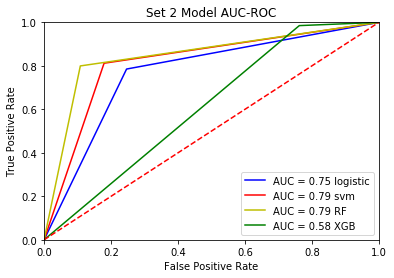

In [295]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = clf.predict_proba(X_test)
preds = probs[:,1]


fpr21, tpr21, threshold = metrics.roc_curve(y_test, s2_1_y_pred)
roc_auc21 = metrics.auc(fpr21, tpr21)
fpr22, tpr22, threshold = metrics.roc_curve(y_test, s2_2_y_pred)
roc_auc22 = metrics.auc(fpr22, tpr22)
fpr23, tpr23, threshold = metrics.roc_curve(y_test, s2_3_y_pred)
roc_auc23 = metrics.auc(fpr23, tpr23)
fpr24, tpr24, threshold = metrics.roc_curve(y_test, s2_4_y_pred)
roc_auc24 = metrics.auc(fpr24, tpr24)


# method I: plt
import matplotlib.pyplot as plt
plt.title('Set 2 Model AUC-ROC')
plt.plot(fpr11, tpr21, 'b', label = 'AUC = %0.2f logistic' % roc_auc21)
plt.plot(fpr12, tpr22, 'r', label = 'AUC = %0.2f svm' % roc_auc22)
plt.plot(fpr13, tpr23, 'y', label = 'AUC = %0.2f RF' % roc_auc23)
plt.plot(fpr14, tpr24, 'g', label = 'AUC = %0.2f XGB' % roc_auc24)

plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [296]:
summary1

,Logistic Reg.,SVC,Random Forest,XGB
Accuracy_Score,0.780647,0.822029,0.821095,0.605787
Recall_Score,0.807716,0.823273,0.750467,0.973864
Precision_Score,0.766234,0.821229,0.873913,0.560932
F1_Score,0.786428,0.822250,0.807499,0.711849


In [297]:
summary2

,Logistic Reg.,SVC,Random Forest,XGB
Accuracy_Score,0.747978,0.785937,0.790915,0.575296
Recall_Score,0.785314,0.812072,0.799627,0.985065
Precision_Score,0.730747,0.771733,0.785933,0.541382
F1_Score,0.757049,0.791389,0.792721,0.698742


#### We can see that the best model among Set 1 and Set 2 is 'Random Forest in Set 1'
#### All Models have higher score in Set 1 than Set 2
#### However, for building a Churn Model, it is more important to predict customer who will leave correctly rather than the overall accuracy of the model.
#### Let's think carefully: 
#### For Type I error, which is the error to predict the customer who exit, but actually he/she doesn't. 
#### For Type II error, which is the error to predict the customer who not exist, but actually he/she does.
#### Which error is more serious? It should be Type II error.
#### For Type I error case, if we predict wrongly, we may waste cost/resource to retain a customer who actually will stay.
#### For Type II error case, if we predict wrongly, we may take no action to the customer and the customer will therefore leave.
#### Therefore, Recall Score is much more important than Accuracy Score.
#### Before select which model to be used, let's fine tune our model!

## Hyperparameter Tuning - Set 1
I will try to fine tune the Hyperparameter and hope to obtain a better Accuracy and Recall Rate:

In [298]:
from sklearn.model_selection import GridSearchCV

In [299]:
X=pd.concat([X0_c,X0_n1],axis=1)
y=EDA_Data['Exited'].apply(lambda x: 1 if x=='Exit' else 0)

In [300]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [301]:
from imblearn.over_sampling import SMOTE
smk = SMOTE()
# Oversample training  data
X_train, y_train = smk.fit_sample(X_train, y_train)

# Oversample validation data
X_test, y_test = smk.fit_sample(X_test, y_test)

In [302]:
pd.DataFrame(y_train).groupby('Exited').agg({'Exited':'count'})

,Exited
Exited,
0,6356
1,6356


In [315]:
Accuracy_Score=[]
Recall_Score=[]
Precision_Score=[]
F1_Score=[]

### Logistic Regression

In [316]:
from sklearn.linear_model import LogisticRegression

clf =  LogisticRegression(random_state=42)
param_grid = [
    {'C':[0.01,0.1,1,10]}]
     #'max_iter':[100,150,200,1000]}]
    #{'solver': ['newton-cg','sag','lbfgs' ],'penalty':['l2']}] 
    #{'solver': ['liblinear','saga'],'penalty':['l1']}]
search = GridSearchCV(clf, param_grid,scoring='accuracy',cv=5)
lr=search.fit(X_train, y_train)

lr=clf.fit(X_train, y_train)
y_pred=lr.predict(X_test)
lr.score(X_test, y_test) 

print(' Accuracy Score: %.3f' % accuracy_score(y_test, y_pred) ,'\n', 
      'Recall Score: %.3f' % recall_score(y_test, y_pred) ,'\n', #True Postive out of Actual Postive
      'Precision Score: %.3f' % precision_score(y_test, y_pred) ,'\n', #True Postive out of Predicted Postive
      'F1 Score Score: %.3f' % f1_score(y_test, y_pred) ) #Close to 1 is better; Close to 0 is worse

Accuracy_Score.append(accuracy_score(y_test, y_pred))
Recall_Score.append(recall_score(y_test, y_pred))
Precision_Score.append(precision_score(y_test, y_pred))
F1_Score.append(f1_score(y_test, y_pred))

#search.cv_results_


 Accuracy Score: 0.785 
 Recall Score: 0.814 
 Precision Score: 0.770 
 F1 Score Score: 0.791


In [320]:
from sklearn.linear_model import LogisticRegression

clf =  LogisticRegression(random_state=42)

param_grid = [
    {'C':[0.01,0.1,1,10]}]
  #{'solver': ['newton-cg','sag','lbfgs' ],'penalty':['l2']}]
  #{'solver': ['liblinear','saga'],'penalty':['l1']}]
search = GridSearchCV(clf, param_grid,scoring='recall', cv=5)
lr=search.fit(X_train, y_train)

#lr=clf.fit(X_train, y_train)
y_pred=lr.predict(X_test)
lr.score(X_test, y_test) 

print(' Accuracy Score: %.3f' % accuracy_score(y_test, y_pred) ,'\n', 
      'Recall Score: %.3f' % recall_score(y_test, y_pred) ,'\n', #True Postive out of Actual Postive
      'Precision Score: %.3f' % precision_score(y_test, y_pred) ,'\n', #True Postive out of Predicted Postive
      'F1 Score Score: %.3f' % f1_score(y_test, y_pred) ) #Close to 1 is better; Close to 0 is worse

Accuracy_Score.append(accuracy_score(y_test, y_pred))
Recall_Score.append(recall_score(y_test, y_pred))
Precision_Score.append(precision_score(y_test, y_pred))
F1_Score.append(f1_score(y_test, y_pred))

#search.cv_results_

 Accuracy Score: 0.785 
 Recall Score: 0.818 
 Precision Score: 0.768 
 F1 Score Score: 0.792


### SVC (Support Vector Classifier)

In [323]:
from sklearn.svm import SVC
clf = SVC(random_state=42, kernel='rbf')

param_grid = [
  {'C': [0.01,0.1,1,10]}]

search = GridSearchCV(clf, param_grid,scoring='accuracy', cv=5)
svc=search.fit(X_train, y_train)
y_pred=svc.predict(X_test)
svc.score(X_test, y_test) 

print(' Accuracy Score: %.3f' % accuracy_score(y_test, y_pred) ,'\n', 
      'Recall Score: %.3f' % recall_score(y_test, y_pred) ,'\n', #True Postive out of Actual Postive
      'Precision Score: %.3f' % precision_score(y_test, y_pred) ,'\n', #True Postive out of Predicted Postive
      'F1 Score Score: %.3f' % f1_score(y_test, y_pred) ) #Close to 1 is better; Close to 0 is worse

Accuracy_Score.append(accuracy_score(y_test, y_pred))
Recall_Score.append(recall_score(y_test, y_pred))
Precision_Score.append(precision_score(y_test, y_pred))
F1_Score.append(f1_score(y_test, y_pred))
#search.cv_results_

 Accuracy Score: 0.825 
 Recall Score: 0.827 
 Precision Score: 0.824 
 F1 Score Score: 0.826


In [327]:
from sklearn.svm import SVC
clf = SVC(random_state=42, kernel='rbf')

param_grid = [
  {'C': [0.01,0.1,1,10],
   'gamma':['scale', 'auto']}]

search = GridSearchCV(clf, param_grid,scoring='recall', cv=5)
svc=search.fit(X_train, y_train)
y_pred=svc.predict(X_test)
svc.score(X_test, y_test)

print(' Accuracy Score: %.3f' % accuracy_score(y_test, y_pred) ,'\n', 
      'Recall Score: %.3f' % recall_score(y_test, y_pred) ,'\n', #True Postive out of Actual Postive
      'Precision Score: %.3f' % precision_score(y_test, y_pred) ,'\n', #True Postive out of Predicted Postive
      'F1 Score Score: %.3f' % f1_score(y_test, y_pred) ) #Close to 1 is better; Close to 0 is worse

Accuracy_Score.append(accuracy_score(y_test, y_pred))
Recall_Score.append(recall_score(y_test, y_pred))
Precision_Score.append(precision_score(y_test, y_pred))
F1_Score.append(f1_score(y_test, y_pred))
#search.cv_results_

 Accuracy Score: 0.825 
 Recall Score: 0.827 
 Precision Score: 0.824 
 F1 Score Score: 0.826


### Random Forest

In [329]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=42)
param_grid = [
  {'n_estimators' : [140,150,160,170,180,190,200]}]

search = GridSearchCV(clf, param_grid,scoring='accuracy', cv=5)
clf=search.fit(X_train, y_train)
y_pred=clf.predict(X_test)

clf.score(X_test, y_test)
print(' Accuracy Score: %.3f' % accuracy_score(y_test, y_pred) ,'\n', 
      'Recall Score: %.3f' % recall_score(y_test, y_pred) ,'\n', #True Postive out of Actual Postive
      'Precision Score: %.3f' % precision_score(y_test, y_pred) ,'\n', #True Postive out of Predicted Postive
      'F1 Score Score: %.3f' % f1_score(y_test, y_pred) ) #Close to 1 is better; Close to 0 is worse

Accuracy_Score.append(accuracy_score(y_test, y_pred))
Recall_Score.append(recall_score(y_test, y_pred))
Precision_Score.append(precision_score(y_test, y_pred))
F1_Score.append(f1_score(y_test, y_pred))
#search.cv_results_  

 Accuracy Score: 0.831 
 Recall Score: 0.768 
 Precision Score: 0.880 
 F1 Score Score: 0.820


In [332]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=42)
param_grid = [
  {'n_estimators' : [140,150,160,170,180,190,200]}]

search = GridSearchCV(clf, param_grid, scoring='recall', cv=5)
clf=search.fit(X_train, y_train)
y_pred=clf.predict(X_test)

clf.score(X_test, y_test)
print(' Accuracy Score: %.3f' % accuracy_score(y_test, y_pred) ,'\n', 
      'Recall Score: %.3f' % recall_score(y_test, y_pred) ,'\n', #True Postive out of Actual Postive
      'Precision Score: %.3f' % precision_score(y_test, y_pred) ,'\n', #True Postive out of Predicted Postive
      'F1 Score Score: %.3f' % f1_score(y_test, y_pred) ) #Close to 1 is better; Close to 0 is worse

Accuracy_Score.append(accuracy_score(y_test, y_pred))
Recall_Score.append(recall_score(y_test, y_pred))
Precision_Score.append(precision_score(y_test, y_pred))
F1_Score.append(f1_score(y_test, y_pred))
#search.cv_results_ 

 Accuracy Score: 0.832 
 Recall Score: 0.771 
 Precision Score: 0.879 
 F1 Score Score: 0.821


### XGBoost

In [338]:
import xgboost as xgb
dtrain = xgb.DMatrix(data = X_train, label = y_train) 
dtest = xgb.DMatrix(data = X_test, label = y_test) 
# specify parameters via map
param = {'max_depth':4, 'eta':0.6, 'objective':'binary:hinge'}
num_round = 20
bst = xgb.train(param, dtrain, num_round)
# make prediction
y_pred = bst.predict(dtest)
accuracy_score(y_test,y_pred)

print(' Accuracy Score: %.3f' % accuracy_score(y_test, y_pred) ,'\n', 
      'Recall Score: %.3f' % recall_score(y_test, y_pred) ,'\n', #True Postive out of Actual Postive
      'Precision Score: %.3f' % precision_score(y_test, y_pred) ,'\n', #True Postive out of Predicted Postive
      'F1 Score Score: %.3f' % f1_score(y_test, y_pred) ) #Close to 1 is better; Close to 0 is worse

Accuracy_Score.append(accuracy_score(y_test, y_pred))
Recall_Score.append(recall_score(y_test, y_pred))
Precision_Score.append(precision_score(y_test, y_pred))
F1_Score.append(f1_score(y_test, y_pred))

 Accuracy Score: 0.886 
 Recall Score: 0.903 
 Precision Score: 0.873 
 F1 Score Score: 0.887


In [341]:
# Set 3 Score:
ind_name=['Accuracy_Score','Recall_Score','Precision_Score','F1_Score']
summary3=pd.DataFrame(np.vstack((Accuracy_Score,Recall_Score,Precision_Score,F1_Score)),
                      columns=['Logistic Reg.(Accuracy)','Logistic Reg.(Recall)',
                               'SVC (Accuracy)','SVC (Recall)',
                               'Random Forest (Accuracy)','Random Forest (Recall)'
                               ,'XGB'],index=ind_name)
summary3

,Logistic Reg.(Accuracy),Logistic Reg.(Recall),SVC (Accuracy),SVC (Recall),Random Forest (Accuracy),Random Forest (Recall),XGB
Accuracy_Score,0.785314,0.785003,0.825451,0.825451,0.831363,0.832296,0.885501
Recall_Score,0.813939,0.817673,0.827007,0.827007,0.767890,0.771002,0.902925
Precision_Score,0.769865,0.767523,0.824442,0.824442,0.879544,0.878723,0.872520
F1_Score,0.791289,0.791805,0.825722,0.825722,0.819934,0.821346,0.887462


In [350]:
summary1

,Logistic Reg.,SVC,Random Forest,XGB
Accuracy_Score,0.780647,0.822029,0.821095,0.605787
Recall_Score,0.807716,0.823273,0.750467,0.973864
Precision_Score,0.766234,0.821229,0.873913,0.560932
F1_Score,0.786428,0.822250,0.807499,0.711849


In [351]:
summary2

,Logistic Reg.,SVC,Random Forest,XGB
Accuracy_Score,0.747978,0.785937,0.790915,0.575296
Recall_Score,0.785314,0.812072,0.799627,0.985065
Precision_Score,0.730747,0.771733,0.785933,0.541382
F1_Score,0.757049,0.791389,0.792721,0.698742


## Hyperparameter Tuning - Set 2
Also, I will try to fine tune the Hyperparameter and hope to obtain a better Accuracy and Recall Rate:

In [352]:
X1_c2=pd.get_dummies(X1_c)
y=EDA_Data['Exited'].apply(lambda x: 1 if x=='Exit' else 0)

In [353]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1_c2, y, test_size=0.2, random_state=42)

In [354]:
from imblearn.over_sampling import SMOTE
smk = SMOTE()
# Oversample training  data
X_train, y_train = smk.fit_sample(X_train, y_train)

# Oversample validation data
X_test, y_test = smk.fit_sample(X_test, y_test)

In [355]:
pd.DataFrame(y_train).groupby('Exited').agg({'Exited':'count'})

,Exited
Exited,
0,6356
1,6356


In [365]:
Accuracy_Score=[]
Recall_Score=[]
Precision_Score=[]
F1_Score=[]

### Logistic Regression

In [366]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=42)


param_grid = [
  {'C':[0.1,1,10],'max_iter':[1000,10000]}]
  #{'solver': ['newton-cg','sag','lbfgs'],'C':[0.1,1,10],'max_iter':[1000,10000]}] 
  #{'solver': ['newton-cg','sag','lbfgs' ],'penalty':['l2'],'C':[0.1,1,10],'max_iter':[1000,10000]}] #1
  #{'solver': ['liblinear','saga'],'penalty':['l1'],'max_iter':[1000,10000]}]
search = GridSearchCV(clf, param_grid, scoring='accuracy', cv=5)


lr=search.fit(X_train, y_train)
y_pred=lr.predict(X_test)
lr.score(X_test, y_test) 

print(' Accuracy Score: %.3f' % accuracy_score(y_test, y_pred) ,'\n', 
      'Recall Score: %.3f' % recall_score(y_test, y_pred) ,'\n', #True Postive out of Actual Postive
      'Precision Score: %.3f' % precision_score(y_test, y_pred) ,'\n', #True Postive out of Predicted Postive
      'F1 Score Score: %.3f' % f1_score(y_test, y_pred) ) #Close to 1 is better; Close to 0 is worse

Accuracy_Score.append(accuracy_score(y_test, y_pred))
Recall_Score.append(recall_score(y_test, y_pred))
Precision_Score.append(precision_score(y_test, y_pred))
F1_Score.append(f1_score(y_test, y_pred))
#search.cv_results_  (No much Change)

 Accuracy Score: 0.753 
 Recall Score: 0.782 
 Precision Score: 0.740 
 F1 Score Score: 0.760


In [373]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=42)

param_grid = [
    {'C':[0.1,1,10],'max_iter':[1000,10000]}]
  #{'solver': ['newton-cg','sag','lbfgs' ],'C':[0.1,1,10],'max_iter':[1000,10000]}] 
  #{'solver': ['newton-cg','sag','lbfgs' ],'penalty':['l2'],'C':[0.1,1,10],'max_iter':[1000,10000]}]
  #{'solver': ['liblinear','saga'],'penalty':['l1'],'C':[0.1,1,10],'max_iter':[1000,10000]}]
search = GridSearchCV(clf, param_grid, scoring='recall', cv=5)


lr=search.fit(X_train, y_train)
y_pred=lr.predict(X_test)
lr.score(X_test, y_test) 

print(' Accuracy Score: %.3f' % accuracy_score(y_test, y_pred) ,'\n', 
      'Recall Score: %.3f' % recall_score(y_test, y_pred) ,'\n', #True Postive out of Actual Postive
      'Precision Score: %.3f' % precision_score(y_test, y_pred) ,'\n', #True Postive out of Predicted Postive
      'F1 Score Score: %.3f' % f1_score(y_test, y_pred) ) #Close to 1 is better; Close to 0 is worse

Accuracy_Score.append(accuracy_score(y_test, y_pred))
Recall_Score.append(recall_score(y_test, y_pred))
Precision_Score.append(precision_score(y_test, y_pred))
F1_Score.append(f1_score(y_test, y_pred))
#search.cv_results_  (No much Change)

 Accuracy Score: 0.753 
 Recall Score: 0.782 
 Precision Score: 0.740 
 F1 Score Score: 0.760


### SVC (Support Vector Classifier)

In [376]:
from sklearn.svm import SVC

clf = SVC(random_state=42)#,C=1,kernel='rbf',gamma='scale')


param_grid = [
    {'C': [0.01,0.1,1,10]}]    
   #{'C': [0.01,0.1,1,10], 'kernel': ['rbf'],'gamma':['scale','auto']}]

search = GridSearchCV(clf, param_grid, scoring='accuracy', cv=5)
svc=search.fit(X_train, y_train)
y_pred=svc.predict(X_test)


#svc=clf.fit(X_train, y_train)
#y_pred=svc.predict(X_test)
#s2_2_y_pred=y_pred

svc.score(X_test, y_test)
print(' Accuracy Score: %.3f' % accuracy_score(y_test, y_pred) ,'\n', 
      'Recall Score: %.3f' % recall_score(y_test, y_pred) ,'\n', #True Postive out of Actual Postive
      'Precision Score: %.3f' % precision_score(y_test, y_pred) ,'\n', #True Postive out of Predicted Postive
      'F1 Score Score: %.3f' % f1_score(y_test, y_pred) ) #Close to 1 is better; Close to 0 is worse

Accuracy_Score.append(accuracy_score(y_test, y_pred))
Recall_Score.append(recall_score(y_test, y_pred))
Precision_Score.append(precision_score(y_test, y_pred))
F1_Score.append(f1_score(y_test, y_pred))
#search.cv_results_ 

 Accuracy Score: 0.789 
 Recall Score: 0.806 
 Precision Score: 0.780 
 F1 Score Score: 0.793


In [378]:
from sklearn.svm import SVC

clf = SVC(random_state=42)#,C=1,kernel='rbf',gamma='scale')


param_grid = [
  {'C': [0.01,0.1,1,10]}]    
  #{'C': [0.01,0.1,1,10], 'kernel': ['rbf'],'gamma':['scale','auto']}]

search = GridSearchCV(clf, param_grid, scoring='recall', cv=5)

svc=search.fit(X_train, y_train)
y_pred=svc.predict(X_test)


#svc=clf.fit(X_train, y_train)
#y_pred=svc.predict(X_test)
#s2_2_y_pred=y_pred

svc.score(X_test, y_test)
print(' Accuracy Score: %.3f' % accuracy_score(y_test, y_pred) ,'\n', 
      'Recall Score: %.3f' % recall_score(y_test, y_pred) ,'\n', #True Postive out of Actual Postive
      'Precision Score: %.3f' % precision_score(y_test, y_pred) ,'\n', #True Postive out of Predicted Postive
      'F1 Score Score: %.3f' % f1_score(y_test, y_pred) ) #Close to 1 is better; Close to 0 is worse

Accuracy_Score.append(accuracy_score(y_test, y_pred))
Recall_Score.append(recall_score(y_test, y_pred))
Precision_Score.append(precision_score(y_test, y_pred))
F1_Score.append(f1_score(y_test, y_pred))
#search.cv_results_ 

 Accuracy Score: 0.765 
 Recall Score: 0.826 
 Precision Score: 0.736 
 F1 Score Score: 0.778


### Random Forest

In [388]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(random_state=42)
param_grid = [
  #{'n_estimators' : [100,150,200],'max_depth':[5,10,15]}]
  #{'n_estimators' : [100,110,120,130,140,150],'max_depth':[5,6,7,8,9,10]}]
  #{'n_estimators' : [100,110,120,130,140,150],'max_depth':[9,10]}]
  #{'n_estimators' : [110,111,112,113,114,115,116,117,118,119],'max_depth':[5,10,15]}]
   {'n_estimators' : [117,118,119],'max_depth':[9,10,11],'criterion':['gini','entropy']}]
search = GridSearchCV(clf, param_grid, scoring='accuracy', cv=5)
clf=search.fit(X_train, y_train)
y_pred=clf.predict(X_test)

#clf.fit(X_train, y_train)
#y_pred=clf.predict(X_test)
clf.score(X_test, y_test)

print(' Accuracy Score: %.3f' % accuracy_score(y_test, y_pred) ,'\n', 
      'Recall Score: %.3f' % recall_score(y_test, y_pred) ,'\n', #True Postive out of Actual Postive
      'Precision Score: %.3f' % precision_score(y_test, y_pred) ,'\n', #True Postive out of Predicted Postive
      'F1 Score Score: %.3f' % f1_score(y_test, y_pred) ) #Close to 1 is better; Close to 0 is worse

Accuracy_Score.append(accuracy_score(y_test, y_pred))
Recall_Score.append(recall_score(y_test, y_pred))
Precision_Score.append(precision_score(y_test, y_pred))
F1_Score.append(f1_score(y_test, y_pred))

#search.cv_results_

 Accuracy Score: 0.780 
 Recall Score: 0.796 
 Precision Score: 0.772 
 F1 Score Score: 0.784


In [407]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(random_state=42)
param_grid = [
  #{'n_estimators' : [100,150,200],'max_depth':[5,10,15]}]
  #{'n_estimators' : [100,110,120,130,140,150],'max_depth':[5,6,7,8,9,10]}]
  #{'n_estimators' : [100,110,120,130,140,150],'max_depth':[9,10]}]
  #{'n_estimators' : [105,106,107,108,109,110,111,112,113,114,115,116,117,118,119],'max_depth':[9,10,11]}]
   {'n_estimators' : [108,109],'max_depth':[9]}]
search = GridSearchCV(clf, param_grid, scoring='recall', cv=5)
clf=search.fit(X_train, y_train)
y_pred=clf.predict(X_test)

#clf.fit(X_train, y_train)
#y_pred=clf.predict(X_test)
clf.score(X_test, y_test)

print(' Accuracy Score: %.3f' % accuracy_score(y_test, y_pred) ,'\n', 
      'Recall Score: %.3f' % recall_score(y_test, y_pred) ,'\n', #True Postive out of Actual Postive
      'Precision Score: %.3f' % precision_score(y_test, y_pred) ,'\n', #True Postive out of Predicted Postive
      'F1 Score Score: %.3f' % f1_score(y_test, y_pred) ) #Close to 1 is better; Close to 0 is worse

Accuracy_Score.append(accuracy_score(y_test, y_pred))
Recall_Score.append(recall_score(y_test, y_pred))
Precision_Score.append(precision_score(y_test, y_pred))
F1_Score.append(f1_score(y_test, y_pred))

#search.cv_results_

 Accuracy Score: 0.780 
 Recall Score: 0.800 
 Precision Score: 0.770 
 F1 Score Score: 0.784


### XGBoost

In [406]:
#scale_pos_weight=sum(negative instances) / sum(positive instances)
import xgboost as xgb
dtrain = xgb.DMatrix(data = X_train, label = y_train) 
dtest = xgb.DMatrix(data = X_test, label = y_test) 
# specify parameters via map
param = {'max_depth':5, 'eta':0.07,'objective':'binary:hinge'}
num_round = 500
bst = xgb.train(param, dtrain, num_round)
# make prediction
y_pred = bst.predict(dtest)
accuracy_score(y_test,y_pred)

print(' Accuracy Score: %.3f' % accuracy_score(y_test, y_pred) ,'\n', 
      'Recall Score: %.3f' % recall_score(y_test, y_pred) ,'\n', #True Postive out of Actual Postive
      'Precision Score: %.3f' % precision_score(y_test, y_pred) ,'\n', #True Postive out of Predicted Postive
      'F1 Score Score: %.3f' % f1_score(y_test, y_pred) ) #Close to 1 is better; Close to 0 is worse

Accuracy_Score.append(accuracy_score(y_test, y_pred))
Recall_Score.append(recall_score(y_test, y_pred))
Precision_Score.append(precision_score(y_test, y_pred))
F1_Score.append(f1_score(y_test, y_pred))

 Accuracy Score: 0.786 
 Recall Score: 0.815 
 Precision Score: 0.770 
 F1 Score Score: 0.792


In [409]:
# Set 4 Score:
ind_name=['Accuracy_Score','Recall_Score','Precision_Score','F1_Score']
summary4=pd.DataFrame(np.vstack((Accuracy_Score,Recall_Score,Precision_Score,F1_Score)),
                      columns=['Logistic Reg.(Accuracy)','Logistic Reg.(Recall)',
                               'SVC (Accuracy)','SVC (Recall)',
                               'Random Forest (Accuracy)','Random Forest (Recall)'
                               ,'XGB'],index=ind_name)
summary4

,Logistic Reg.(Accuracy),Logistic Reg.(Recall),SVC (Accuracy),SVC (Recall),Random Forest (Accuracy),Random Forest (Recall),XGB
Accuracy_Score,0.753267,0.753267,0.789359,0.764779,0.780336,0.780336,0.780336
Recall_Score,0.781581,0.781581,0.806472,0.826385,0.795893,0.799627,0.799627
Precision_Score,0.739694,0.739694,0.779783,0.735734,0.771877,0.769922,0.769922
F1_Score,0.760061,0.760061,0.792903,0.778429,0.783701,0.784493,0.784493


## Model Selection

In [410]:
summary1

,Logistic Reg.,SVC,Random Forest,XGB
Accuracy_Score,0.780647,0.822029,0.821095,0.605787
Recall_Score,0.807716,0.823273,0.750467,0.973864
Precision_Score,0.766234,0.821229,0.873913,0.560932
F1_Score,0.786428,0.822250,0.807499,0.711849


In [411]:
summary2

,Logistic Reg.,SVC,Random Forest,XGB
Accuracy_Score,0.747978,0.785937,0.790915,0.575296
Recall_Score,0.785314,0.812072,0.799627,0.985065
Precision_Score,0.730747,0.771733,0.785933,0.541382
F1_Score,0.757049,0.791389,0.792721,0.698742


In [413]:
summary3

,Logistic Reg.(Accuracy),Logistic Reg.(Recall),SVC (Accuracy),SVC (Recall),Random Forest (Accuracy),Random Forest (Recall),XGB
Accuracy_Score,0.785314,0.785003,0.825451,0.825451,0.831363,0.832296,0.885501
Recall_Score,0.813939,0.817673,0.827007,0.827007,0.767890,0.771002,0.902925
Precision_Score,0.769865,0.767523,0.824442,0.824442,0.879544,0.878723,0.872520
F1_Score,0.791289,0.791805,0.825722,0.825722,0.819934,0.821346,0.887462


In [414]:
summary4

,Logistic Reg.(Accuracy),Logistic Reg.(Recall),SVC (Accuracy),SVC (Recall),Random Forest (Accuracy),Random Forest (Recall),XGB
Accuracy_Score,0.753267,0.753267,0.789359,0.764779,0.780336,0.780336,0.780336
Recall_Score,0.781581,0.781581,0.806472,0.826385,0.795893,0.799627,0.799627
Precision_Score,0.739694,0.739694,0.779783,0.735734,0.771877,0.769922,0.769922
F1_Score,0.760061,0.760061,0.792903,0.778429,0.783701,0.784493,0.784493


After hyperparameter tuning, we can see that:
1) For Accuracy, All score in set 1 Model have been improved, while in set 2 Model, only Logistic Regression, SVC and XGB have been improved.

2) For Recall rate, Logistic Regression, SVC and Random Forest have been improved in set 1 while only SVC have been improved in set 2.

So, which model should be used?
In my opinion, XGB with hyperparameter tuning in set 1 is recommended to use.
As mentioned before, our business question is find out customer who will exit the bank.
Therefore, Recall Rate is more important than Accuracy Score.

Recap that:
TP (True Positive): Predict customer will exit while the customer really exit
TN (True Negative): Predict customer will not exit while the customer really not exit
FP (False Positive): Predict customer will exit while actually the customer will not exit 
FN (False Negative): Predict customer will not exit while actually the customer will exit 

Accuracy Rate = TP/(TP+TN)
Recall Rate = TP/(TP+FN)
Precision = TP/(TP+FP)
F1 Score = 2TP/(2TP+FP+FN)

In our case, we want predict Exit customer for retention.
Therefore, which ones is more important?
A) Finding a exit customer from a base with exiting customer and not exiting customer correctly? OR
B) Finding a exit customer from a base with exiting customer and 'I guess the customer will not leave, but actually the customer will leave'? OR
C) Finding a exit customer from a base with exiting customer and 'I guess the customer will leave, but actually the customer will not leave'?

The answer should be B, right? 
We should minimize the % of 'I guess the customer will not leave, but actually the customer will leave', i.e. Use the highest recall rate.

Therefore XGBoost in set 1 seems the best ones we are going to use.
We should the ones with hyperparameter tuning because the F1_Score is higher than the ones without tuning.
F1 score becomes high only when both precision and recall are high.
